In [3]:
import matplotlib.pyplot as plt
import numpy as np 
from arch import arch_model
from datetime import datetime, timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas_datareader.data as web

In [41]:
from arch.data import nasdaq
data = nasdaq.load()
returns = data[["Adj Close"]].pct_change().dropna()

In [42]:
returns.index.max()

Timestamp('2018-12-31 00:00:00')

In [43]:
returns

,Adj Close
Date,
1999-01-05,0.019574
1999-01-06,0.030911
1999-01-07,0.002253
1999-01-08,0.007876
1999-01-11,0.017139
...,...
2018-12-24,-0.022118
2018-12-26,0.058363
2018-12-27,0.003834


In [18]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)

returns = data[["Adj Close"]].pct_change().dropna() *100

Text(0.5, 1.0, 'returns')

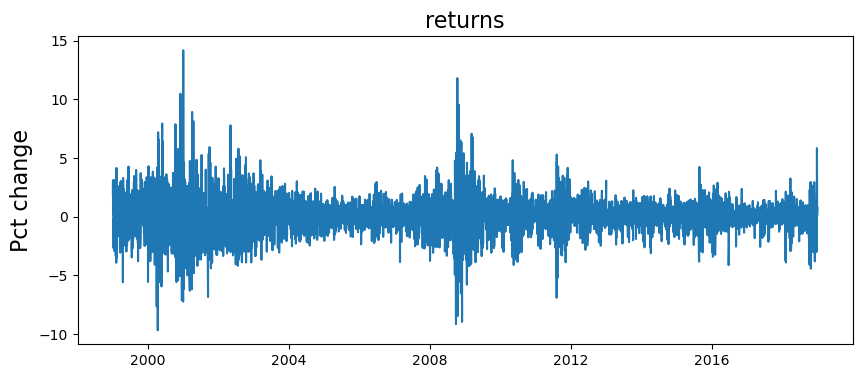

In [19]:
plt.figure(figsize=(10, 4))
plt.plot(returns)
plt.ylabel('Pct change', fontsize=16)
plt.title('returns', fontsize=16)

хороший кандидат для гарча так как тут есть кластеризованная волатильность

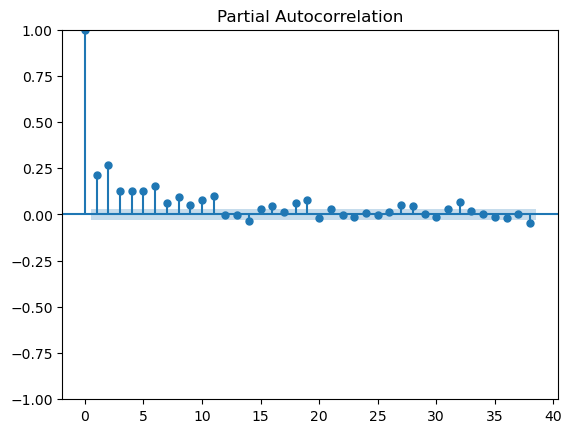

In [20]:
plot_pacf(returns**2)
plt.show()

In [21]:
model = arch_model(returns, p=3, q=3)

In [22]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 101607627681525.89
Iteration:      2,   Func. Count:     23,   Neg. LLF: 2741738598.5406084
Iteration:      3,   Func. Count:     35,   Neg. LLF: 11575.746011265182
Iteration:      4,   Func. Count:     46,   Neg. LLF: 8512.752174423575
Iteration:      5,   Func. Count:     56,   Neg. LLF: 8455.819690764316
Iteration:      6,   Func. Count:     66,   Neg. LLF: 8389.294953761535
Iteration:      7,   Func. Count:     76,   Neg. LLF: 8270.254160541843
Iteration:      8,   Func. Count:     86,   Neg. LLF: 8263.578460519078
Iteration:      9,   Func. Count:     96,   Neg. LLF: 8311.093370445344
Iteration:     10,   Func. Count:    106,   Neg. LLF: 8258.485209444769
Iteration:     11,   Func. Count:    116,   Neg. LLF: 8259.936823953805
Iteration:     12,   Func. Count:    126,   Neg. LLF: 8256.703258117945
Iteration:     13,   Func. Count:    136,   Neg. LLF: 8256.156008248201
Iteration:     14,   Func. Count:    146,   Neg. LLF: 8255.94

In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8254.97
Distribution:                  Normal   AIC:                           16525.9
Method:            Maximum Likelihood   BIC:                           16578.1
                                        No. Observations:                 5030
Date:                Thu, Nov 28 2024   Df Residuals:                     5029
Time:                        12:49:57   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0766  1.512e-02      5.064  4.102e-07 [4.692e-02,  0.106]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0461  1.655e-02      2.785  5.361e-03 [1.364e-02,7.851e-02]
alpha[1]       0.0449  1.761e-02      2.550  1.077e-02 [1.039e-02,7.942e-02]
alpha[2]       0.1097  2.319e-02      4.730  2.245e-06   [6.425e-02,  0.155]
alpha[3]       0.0321  4.279e-02      0.749      0.454  [-5.180e-02,  0.116]
beta[1]    2.3781e-15      0.300  7.932e-15      1.000     [ -0.588,  0.588]
beta[2]        0.7523  5.683e-02     13.237  5.362e-40     [  0.641,  0.864]
beta[3]        0.0394      0.226      0.175      0.861     [ -0.403,  0.482]
============================================================================

Covariance estimator: robust
"""

In [25]:
# GARCH(3, 0) == ARCH(3)


model = arch_model(returns, p=3, q=0)
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32042.42483523523
Iteration:      2,   Func. Count:     17,   Neg. LLF: 13821.525374246106
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1876375.2808178116
Iteration:      4,   Func. Count:     33,   Neg. LLF: 52107.38892329281
Iteration:      5,   Func. Count:     40,   Neg. LLF: 32859.19274421503
Iteration:      6,   Func. Count:     47,   Neg. LLF: 19337.16650144708
Iteration:      7,   Func. Count:     54,   Neg. LLF: 21416.14179436136
Iteration:      8,   Func. Count:     61,   Neg. LLF: 8831.703643290757
Iteration:      9,   Func. Count:     68,   Neg. LLF: 8684.71525721456
Iteration:     10,   Func. Count:     75,   Neg. LLF: 8656.57611893313
Iteration:     11,   Func. Count:     81,   Neg. LLF: 8655.939479449135
Iteration:     12,   Func. Count:     87,   Neg. LLF: 8655.894785060511
Iteration:     13,   Func. Count:     93,   Neg. LLF: 8655.881395555329
Iteration:     14,   Func. Count:     99,   Neg. LLF: 8655.88036

In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8655.88
Distribution:                  Normal   AIC:                           17321.8
Method:            Maximum Likelihood   BIC:                           17354.4
                                        No. Observations:                 5030
Date:                Thu, Nov 28 2024   Df Residuals:                     5029
Time:                        12:53:11   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0822  1.771e-02      4.644  3.413e-06 [4.753e-02,  0.117]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.7063  4.676e-02     15.106  1.475e-51 [  0.615,  0.798]
alpha[1]       0.2002  2.958e-02      6.766  1.326e-11 [  0.142,  0.258]
alpha[2]       0.3353  3.745e-02      8.952  3.475e-19 [  0.262,  0.409]
alpha[3]       0.2546  3.119e-02      8.164  3.248e-16 [  0.193,  0.316]
========================================================================

Covariance estimator: robust
"""

In [27]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [29]:
import pandas as pd
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

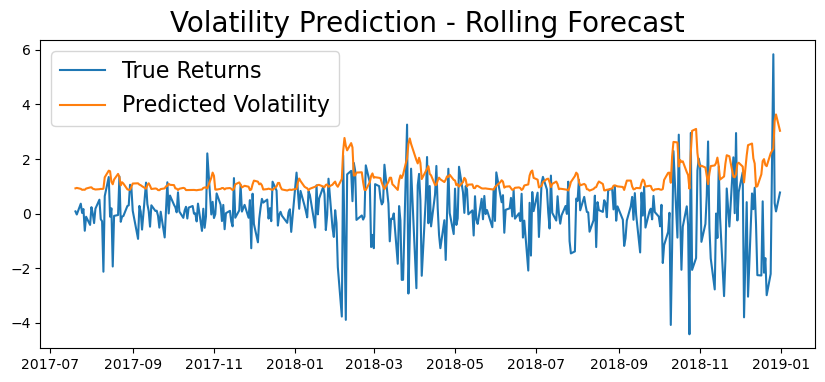

In [30]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,
2024-07-25,179.850006,179.850006,183.899994,176.800003,182.910004,44464200
2024-07-26,182.500000,182.500000,183.190002,180.240005,180.389999,29506000
2024-07-29,183.199997,183.199997,184.750000,182.380005,183.839996,33270100
2024-07-30,181.710007,181.710007,185.860001,179.380005,184.720001,39508600
2024-07-31,186.979996,186.979996,187.940002,184.460007,185.050003,41667300


# SP500

[*********************100%***********************]  1 of 1 completed


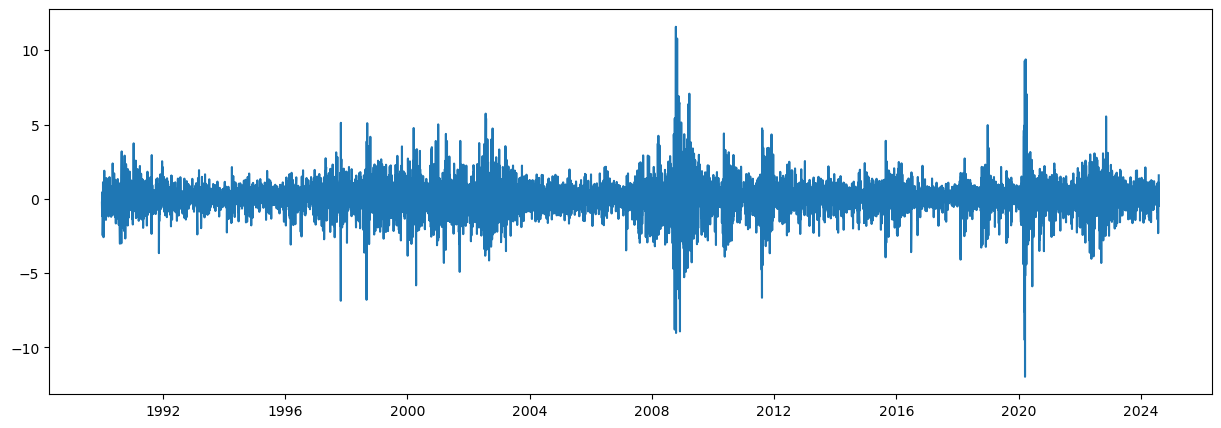

In [59]:
import yfinance as yf

start_date = '1990-01-01'
end_date = '2024-08-1'

# Set the ticker
ticker = '^GSPC'

# Get the data
data = yf.download(ticker, start_date, end_date)


market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()

fig, ax = plt.subplots(1,1, figsize=(15, 5))

ax.plot(returns);

# GARCH (with a Constant Mean)

In [67]:
am = arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
res = am.fit(disp = 'off', show_warning = False)
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -11560.3
Distribution:                  Normal   AIC:                           23128.6
Method:            Maximum Likelihood   BIC:                           23156.8
                                        No. Observations:                 8710
Date:                Thu, Nov 28 2024   Df Residuals:                     8709
Time:                        17:08:31   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0642  8.498e-03      7.554  4.227e-14 [4.

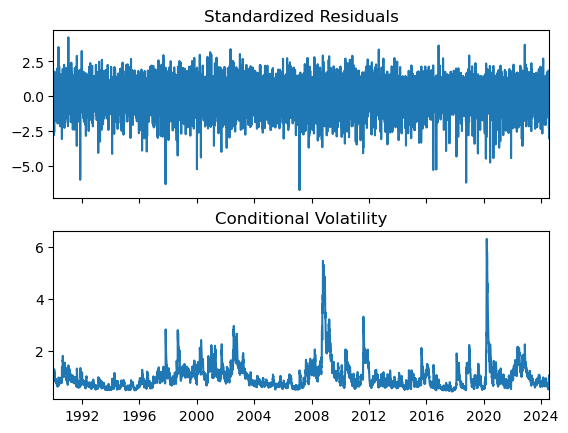

In [66]:
fig = res.plot()

In [68]:
am = arch_model(returns, vol='Garch', p=1, o=0, q=1, dist="StudentsT")
res = am.fit(disp = 'off', show_warning = False)
print(res.summary())


                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        ^GSPC   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -11369.5
Distribution:      Standardized Student's t   AIC:                           22749.0
Method:                  Maximum Likelihood   BIC:                           22784.4
                                              No. Observations:                 8710
Date:                      Thu, Nov 28 2024   Df Residuals:                     8709
Time:                              17:15:24   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu  

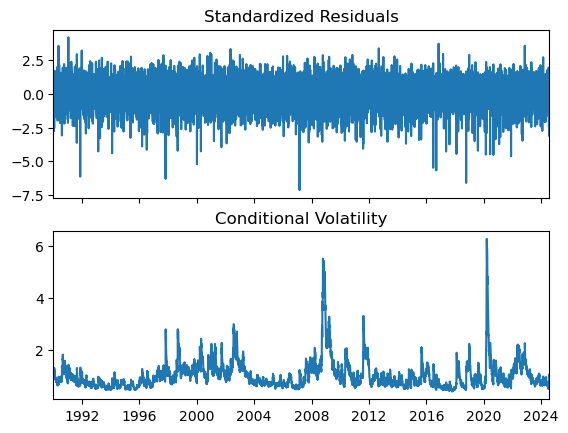

In [69]:
fig = res.plot()

In [8]:
# справочник Финама с id тикеров

with open("finam_dicts.pkl", "rb") as f:
    finam_dicts = pickle.load(f)
finam_dicts['periods']['5min']

{'tick': 1,
 'min': 2,
 '5min': 3,
 '10min': 4,
 '15min': 5,
 '30min': 6,
 'hour': 7,
 'daily': 8,
 'week': 9,
 'month': 10}

In [12]:
from urllib.parse import urlencode
from urllib.request import urlopen
from datetime import datetime
import pandas as pd
import pickle

def load_data(ticker:str, start, end):

    FINAM_URL = "http://export.finam.ru/"# сервер, на который стучимся
    
    with open("finam_dicts.pkl", "rb") as f:
        finam_dicts = pickle.load(f)

    print ("ticker="+ticker+"; period="+str(finam_dicts['periods']['5min'])+"; start="+start+"; end="+end)
    
    start_date     = datetime.strptime(start, "%d.%m.%Y").date()
    start_date_rev = datetime.strptime(start, '%d.%m.%Y').strftime('%Y%m%d')
    end_date       = datetime.strptime(end, "%d.%m.%Y").date()
    end_date_rev   = datetime.strptime(end, '%d.%m.%Y').strftime('%Y%m%d')
    
    params = urlencode(
        [
            ('market', 0), #на каком рынке торгуется бумага
            ('em', finam_dicts['tickers'][ticker]), #вытягиваем цифровой символ, который соответствует бумаге.
            ('code', ticker), #тикер нашей акции
            ('apply',0), #не нашёл что это значит. 
            ('df', start_date.day), #Начальная дата, номер дня (1-31)
            ('mf', start_date.month - 1), #Начальная дата, номер месяца (0-11)
            ('yf', start_date.year), #Начальная дата, год
            ('from', start_date), #Начальная дата полностью
            ('dt', end_date.day), #Конечная дата, номер дня	
            ('mt', end_date.month - 1), #Конечная дата, номер месяца
            ('yt', end_date.year), #Конечная дата, год
            ('to', end_date), #Конечная дата
            ('p', finam_dicts["periods"]['5min']), #Таймфрейм
            ('f', ticker+"_" + start_date_rev + "_" + end_date_rev), #Имя сформированного файла
            ('e', ".csv"), #Расширение сформированного файла
            ('cn', ticker), #ещё раз тикер акции	
            ('dtf', 4), #В каком формате брать даты. Выбор из 5 возможных. См. страницу https://www.finam.ru/profile/moex-akcii/sberbank/export/
            ('tmf', 3), #В каком формате брать время. Выбор из 4 возможных.
            ('MSOR', 0), #Время свечи (0 - open; 1 - close)	
            ('mstime', "on"), #Московское время	
            ('mstimever', 1), #Коррекция часового пояса	
            ('sep', 1), #Разделитель полей	(1 - запятая, 2 - точка, 3 - точка с запятой, 4 - табуляция, 5 - пробел)
            ('sep2', 1), #Разделитель разрядов
            ('datf', 1), #Формат записи в файл. Выбор из 6 возможных.
            ('at', 1)  #Нужны ли заголовки столбцов
        ]
    ) 
    
    url = FINAM_URL + ticker+"_" + start_date_rev + "_" + end_date_rev + ".csv?" + params #урл составлен!
    
    #print("Стучимся на Финам по ссылке: "+url)
    txt=urlopen(url).readlines() #здесь лежит огромный массив данных, прилетевший с Финама.json.loads(

    local_file = open('output.csv', "w") #задаём файл, в который запишем котировки.
    for line in txt: #записываем свечи строку за строкой.      
    	local_file.write(line.strip().decode( "utf-8" )+'\n')
    local_file.close()
    #print("Готово. Проверьте файл quotes.txt в папке где лежит скрипт")

In [131]:
start_date = '2020-01-01'
end_date   = '2024-11-28'

# Создаем индекс дат с шагом в 1 месяц
date_index = pd.date_range(start=start_date, end=end_date, freq='MS') 

# Преобразуем индекс в DataFrame и выбираем только столбец с месяцами
df = pd.DataFrame({'Month': date_index})

# Выводим результат


dates_list = df['Month'].dt.strftime('%d.%m.%Y').values

data = None

for i in range(len(dates_list) - 1):
    load_data(ticker="SBER", start = dates_list[i], end = dates_list[i+1])
    tmp = pd.read_csv('output.csv')
    if data is None:
        data = tmp
    else:
        data = pd.concat([data, tmp])

ticker=SBER; period=3; start=01.01.2020; end=01.02.2020
ticker=SBER; period=3; start=01.02.2020; end=01.03.2020
ticker=SBER; period=3; start=01.03.2020; end=01.04.2020
ticker=SBER; period=3; start=01.04.2020; end=01.05.2020
ticker=SBER; period=3; start=01.05.2020; end=01.06.2020
ticker=SBER; period=3; start=01.06.2020; end=01.07.2020
ticker=SBER; period=3; start=01.07.2020; end=01.08.2020
ticker=SBER; period=3; start=01.08.2020; end=01.09.2020
ticker=SBER; period=3; start=01.09.2020; end=01.10.2020
ticker=SBER; period=3; start=01.10.2020; end=01.11.2020
ticker=SBER; period=3; start=01.11.2020; end=01.12.2020
ticker=SBER; period=3; start=01.12.2020; end=01.01.2021
ticker=SBER; period=3; start=01.01.2021; end=01.02.2021
ticker=SBER; period=3; start=01.02.2021; end=01.03.2021
ticker=SBER; period=3; start=01.03.2021; end=01.04.2021
ticker=SBER; period=3; start=01.04.2021; end=01.05.2021
ticker=SBER; period=3; start=01.05.2021; end=01.06.2021
ticker=SBER; period=3; start=01.06.2021; end=01.

In [132]:
data = (
    data
    .drop_duplicates()
    .rename(columns={"<TICKER>": "Tiker", "<DATE>": "Date", "<TIME>": "Time", 
                     "<OPEN>": "Open", "<HIGH>": "High", "<LOW>": "Low",
                     "<CLOSE>": "Close", "<VOL>": "Volume"
                                       }
    )
    .assign(returns = lambda x: x.Close.pct_change().fillna(0))
    .assign(DateTime = lambda x: pd.to_datetime(x.Date + " " + x.Time, format='%d/%m/%y %H:%M:%S'))
    .drop(columns=["<PER>", "Date",	"Time"])
)

In [133]:
data

,Tiker,Open,High,Low,Close,Volume,returns,DateTime
0,SBER,255.97,256.97,255.85,256.77,1161410,0.000000,2020-01-03 10:00:00
1,SBER,256.77,256.90,256.30,256.70,910890,-0.000273,2020-01-03 10:05:00
2,SBER,256.68,256.75,256.03,256.12,440290,-0.002259,2020-01-03 10:10:00
3,SBER,256.19,256.42,255.83,255.89,472330,-0.000898,2020-01-03 10:15:00
4,SBER,255.89,256.31,255.88,256.13,219100,0.000938,2020-01-03 10:20:00
...,...,...,...,...,...,...,...,...
3907,SBER,237.63,237.74,237.59,237.70,22930,0.000295,2024-11-01 23:25:00
3908,SBER,237.68,237.83,237.57,237.67,104040,-0.000126,2024-11-01 23:30:00
3909,SBER,237.68,237.80,237.64,237.80,15460,0.000547,2024-11-01 23:35:00
3910,SBER,237.82,238.00,237.79,237.97,68460,0.000715,2024-11-01 23:40:00


In [134]:
import matplotlib.pyplot as plt
def plotTimeSeries(data: pd.DataFrame, X:str, y:str, axs=None, xlabel:str ="",
                   ylabel:str ="", title:str="", savePath="", **kwargs):

    if axs is not None:
        ax = axs
    else:
        fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    
    ax.plot(data[X], data[y],  **kwargs)
    
    ax.set_title(title)
    ax.set_xlabel(X if xlabel == "" else xlabel)
    ax.set_ylabel(y if ylabel == "" else ylabel)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))

    if "label" in kwargs.keys():
        plt.legend()

    plt.grid(True)    
    if savePath != "":
        plt.savefig(savePath, bbox_inches='tight')
    
    return ax

In [151]:
data = pd.read_csv("dataSber.csv")

In [152]:
data

,Unnamed: 0,open,close,high,low,value,volume,begin,end,timestamp,date,returns
0,1,255.99,255.99,255.99,255.99,7085803.2,27680,2020-01-03 09:50:00,2020-01-03 09:59:59,2020-01-03 09:50:00,2020-01-03,2.718282
1,2,255.97,256.70,256.97,255.85,531605128.6,2072300,2020-01-03 10:00:00,2020-01-03 10:09:59,2020-01-03 10:00:00,2020-01-03,1.002774
2,3,256.68,255.89,256.75,255.83,233819853.8,912620,2020-01-03 10:10:00,2020-01-03 10:19:59,2020-01-03 10:10:00,2020-01-03,0.996845
3,4,255.89,256.29,256.31,255.88,97031962.5,378820,2020-01-03 10:20:00,2020-01-03 10:29:59,2020-01-03 10:20:00,2020-01-03,1.001563
4,5,256.20,256.15,256.32,256.01,61918581.4,241740,2020-01-03 10:30:00,2020-01-03 10:39:59,2020-01-03 10:30:00,2020-01-03,0.999454
...,...,...,...,...,...,...,...,...,...,...,...,...
95863,95864,234.90,234.29,234.90,234.14,215515600.8,919420,2024-11-29 15:50:00,2024-11-29 15:59:59,2024-11-29 15:50:00,2024-11-29,0.997403
95864,95865,234.29,233.99,234.30,233.60,305703905.4,1306400,2024-11-29 16:00:00,2024-11-29 16:09:59,2024-11-29 16:00:00,2024-11-29,0.998720
95865,95866,233.99,234.58,234.67,233.89,216726579.5,925260,2024-11-29 16:10:00,2024-11-29 16:19:59,2024-11-29 16:10:00,2024-11-29,1.002521
95866,95867,234.59,234.20,234.91,233.81,195389616.7,833440,2024-11-29 16:20:00,2024-11-29 16:29:59,2024-11-29 16:20:00,2024-11-29,0.998380


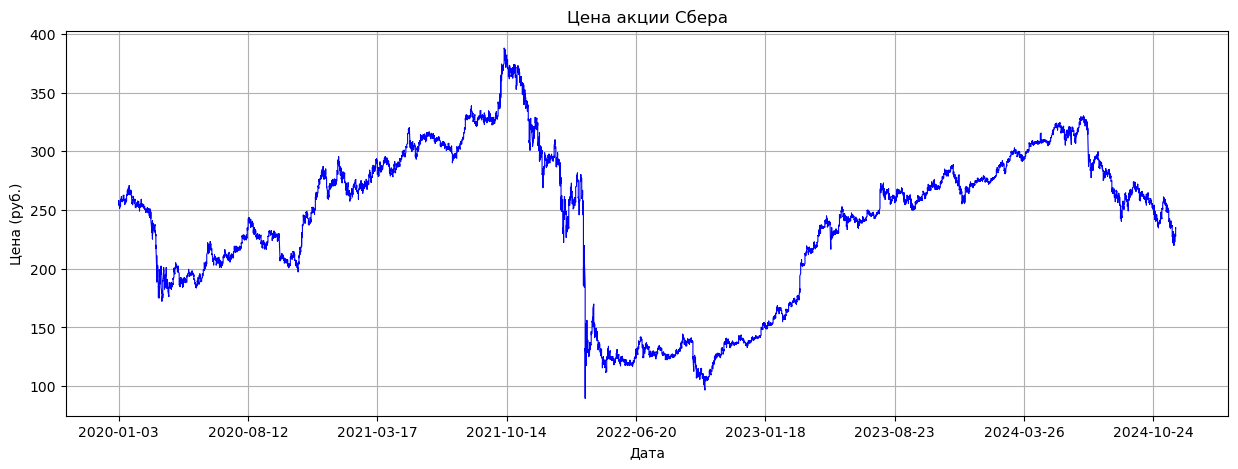

In [153]:
plotTimeSeries(data=data, X="date", y="close", xlabel="Дата", color="blue",
               title="Цена акции Сбера", ylabel="Цена (руб.)",
               linewidth=0.8, savePath="/home/maxim/Projects/Vega/p2/Report/img/price.png");

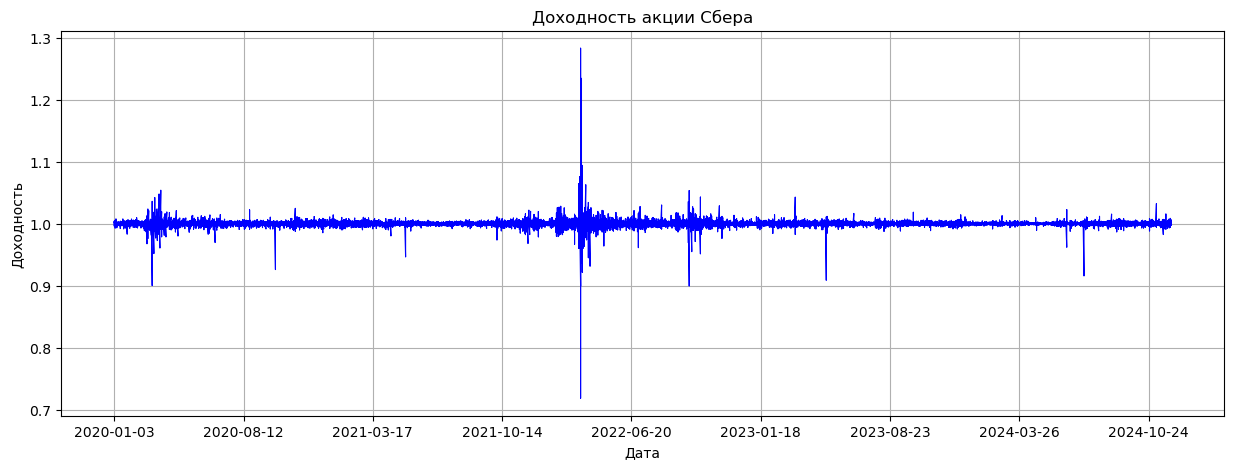

In [155]:
plotTimeSeries(data=data.iloc[1:, ], X="date", y="returns", xlabel="Дата", color="blue",
               title="Доходность акции Сбера", ylabel="Доходность",
               linewidth=0.8, savePath="/home/maxim/Projects/Vega/p2/Report/img/vol.png");

In [165]:
np.sqrt(np.var(tmp))

0.002058483279135436

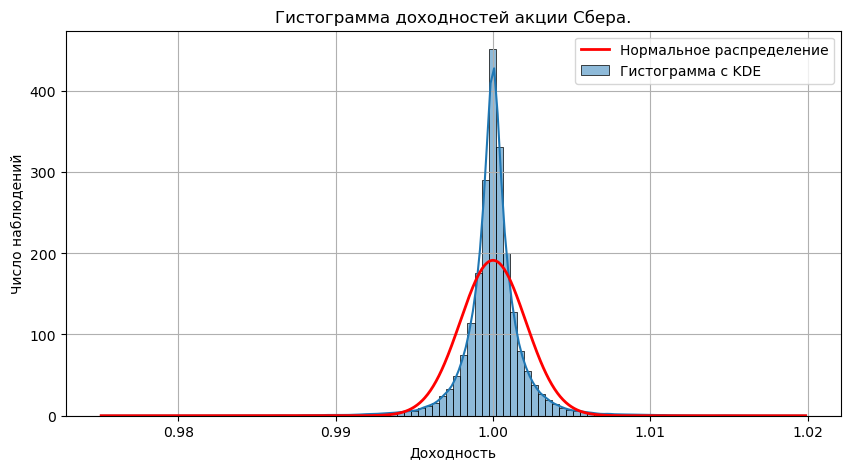

In [168]:
#plt.hist(data.assign(returns= lambda x: x.returns*100).query("(returns < 1.5) & (returns > -1.5)").returns, bins=60);
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


plt.figure(figsize=(10, 5))
tmp = data.query("(returns < 1.02) & (returns > 0.975)").returns
sns.histplot(tmp, stat="density", kde=True, label="Гистограмма с KDE", bins=100)

x = np.linspace(np.min(tmp), np.max(tmp), 1000)


pdf = norm.pdf(x, 1, np.sqrt(np.var(tmp)))

# Наложение нормального распределения
plt.plot(x, pdf, color="red", lw=2, label="Нормальное распределение")
plt.legend(), plt.grid()
plt.xlabel("Доходность")
plt.ylabel("Число наблюдений")
plt.title("Гистограмма доходностей акции Сбера.")
plt.savefig("/home/maxim/Projects/Vega/p2/Report/img/hist.png", bbox_inches='tight');

In [103]:
data.drop_duplicates().assign(returns= lambda x: x.returns*100).query("(returns < 1.5) & (returns > -1.5)").to_csv("sber_data.csv")

In [121]:
# Задаем начальную и конечную даты
start_date = '2022-01-01'
end_date = '2024-01-01'

# Создаем индекс дат с шагом в 1 месяц
date_index = pd.date_range(start=start_date, end=end_date, freq='MS') 

# Преобразуем индекс в DataFrame и выбираем только столбец с месяцами
df = pd.DataFrame({'Month': date_index})

# Выводим результат
print(df['Month'].dt.strftime('%Y-%m-%d').values)

['2022-01-01' '2022-02-01' '2022-03-01' '2022-04-01' '2022-05-01'
 '2022-06-01' '2022-07-01' '2022-08-01' '2022-09-01' '2022-10-01'
 '2022-11-01' '2022-12-01' '2023-01-01' '2023-02-01' '2023-03-01'
 '2023-04-01' '2023-05-01' '2023-06-01' '2023-07-01' '2023-08-01'
 '2023-09-01' '2023-10-01' '2023-11-01' '2023-12-01' '2024-01-01']
